In [146]:
import random
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from IPython.display import clear_output

import matplotlib as mpl
import matplotlib.pyplot as plt

import data_parser
%matplotlib inline

In [3]:
# CUDA
if torch.cuda.is_available():
    dev = "cuda:0"
    print("CUDA avaiable")
else:  
    dev = "cpu"
    print("CUDA not avaiable")
device = torch.device(dev)

CUDA avaiable


In [4]:
df = data_parser.data_parse()

In [1]:
def plot_by_index(dataset, idx, column):
    df = dataset.loc[idx]
    F = df['F']
    y = df[column]
    fig, ax = plt.subplots(figsize=(20, 4))
    ax.plot(F, y)
    
    fig.show()
    
def plot_X_y(X, y, pred=None):

    fig, ax = plt.subplots(figsize=(20, 4))
    ax.plot(X.detach().numpy(), y.detach().numpy())
    if pred != None:
        ax.plot(X.detach().numpy(), pred.detach().numpy())
    fig.show()
    fig.savefig('../Figures/inference.pdf')
    
def live_plot_X_y(X, y, pred=None, epoch=None, loss=None, r2=None):
    clear_output(wait=True)
    fig, ax = plt.subplots(figsize=(20, 4))
    range(len(X))
    ax.plot(X.detach().numpy(), y.detach().numpy())
    if pred != None:
        text_kwargs = dict(fontsize=18, )
        ax.plot(X.detach().numpy(), pred.detach().numpy())
        plt.text(0.5, 3, 'Batch %d Loss: %.4f R2 : %.4f' % (epoch, train_loss, r2), **text_kwargs)

    plt.show();

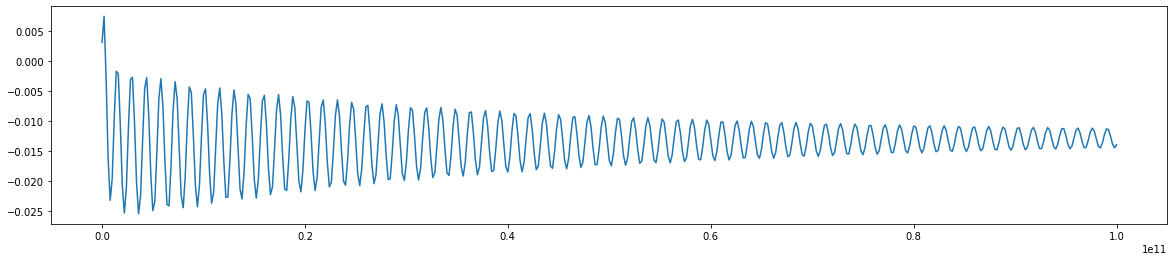

In [95]:
idx = '402200'
output_cols = "SR(1,1)"
X = df.loc[idx]['F'].to_numpy().reshape(-1, 1)
# X = np.tile(X, (1, 20))
y = df.loc[idx][output_cols].to_numpy().reshape(-1, 1)
plot_X_y(torch.Tensor(X)[:,0], torch.Tensor(y))

In [2]:
class MLP_mod(nn.Module):
    def __init__(self):
        super(MLP_mod, self).__init__()
        # Define the layers in the model
        self.sub1_fc1 = nn.Linear(1, 10)
        self.sub1_fc2 = nn.Linear(10, 10)
        self.sub1_fc3 = nn.Linear(10, 1)
        
        self.sub2_fc1 = nn.Linear(1, 4)
        self.sub2_fc2 = nn.Linear(4, 1)

        self.fc1 = nn.Linear(2, 300)
        self.fc2 = nn.Linear(300, 300)
        self.fc3 = nn.Linear(300, 1)

    def forward(self, x):
        # Forward propagation
        x_sub1 = torch.relu(self.sub1_fc1(x))
        x_sub1 = torch.relu(self.sub1_fc2(x_sub1))
        x_sub1 = torch.cos(self.sub1_fc3(x_sub1))

        # x_sub2 = torch.relu(self.sub2_fc1(x))
        # x_sub2 = torch.exp(self.sub2_fc2(x_sub2))

        x = torch.cat((x, x_sub1), dim=1)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
def initialize_weights(self):
    for m in self.modules():
        if isinstance(m, nn.Linear):
            torch.nn.init.kaiming_normal_(m.weight.data, nonlinearity='relu')
            if m.bias is not None:
                torch.nn.init.zeros_(m.bias.data)    

NameError: name 'nn' is not defined

In [97]:
class MLP_7(nn.Module):
    def __init__(self):
        super(MLP_7, self).__init__()
        # Define the layers in the model
        self.fc1 = nn.Linear(1, 200)
        self.fc2 = nn.Linear(200, 200)
        self.fc3 = nn.Linear(200, 200)
        self.fc4 = nn.Linear(200, 200)
        self.fc5 = nn.Linear(200, 200)
        self.fc6 = nn.Linear(200, 1)
        self.bn = nn.BatchNorm1d(200)

    def forward(self, x):
        # Forward propagation
        x = torch.relu(self.bn(self.fc1(x)))
        x = torch.relu(self.bn(self.fc2(x)))
        x = torch.relu(self.bn(self.fc3(x)))
        x = torch.relu(self.bn(self.fc4(x)))
        x = torch.relu(self.bn(self.fc5(x)))
        x = self.fc6(x)
        return x
    
def initialize_weights(self):
    for m in self.modules():
        if isinstance(m, nn.Linear):
            torch.nn.init.kaiming_normal_(m.weight.data, nonlinearity='relu')
            if m.bias is not None:
                torch.nn.init.zeros_(m.bias.data)

In [129]:
class MLP_5(nn.Module):
    def __init__(self):
        super(MLP_5, self).__init__()
        # Define the layers in the model
        self.fc1 = nn.Linear(1, 600)
        self.fc2 = nn.Linear(600, 600)
        self.fc3 = nn.Linear(600, 600)
        self.fc4 = nn.Linear(600, 1)
        self.bn = nn.BatchNorm1d(600)

    def forward(self, x):
        # Forward propagation
        x = torch.relu(self.bn(self.fc1(x)))
        x = torch.relu(self.bn(self.fc2(x)))
        x = torch.relu(self.bn(self.fc3(x)))
        x = self.fc4(x)
        return x
    
def initialize_weights(self):
    for m in self.modules():
        if isinstance(m, nn.Linear):
            torch.nn.init.kaiming_normal_(m.weight.data, nonlinearity='relu')
            if m.bias is not None:
                torch.nn.init.zeros_(m.bias.data)

In [127]:
class MLP_4(nn.Module):
    def __init__(self):
        super(MLP_4, self).__init__()
        # Define the layers in the model
        self.fc1 = nn.Linear(1, 600)
        self.fc2 = nn.Linear(600, 600)
        self.fc3 = nn.Linear(600, 1)
        self.bn = nn.BatchNorm1d(600)

    def forward(self, x):
        # Forward propagation
        x = torch.relu(self.bn(self.fc1(x)))
        x = torch.relu(self.bn(self.fc2(x)))
        x = self.fc3(x)
        return x
    
def initialize_weights(self):
    for m in self.modules():
        if isinstance(m, nn.Linear):
            torch.nn.init.kaiming_normal_(m.weight.data, nonlinearity='relu')
            if m.bias is not None:
                torch.nn.init.zeros_(m.bias.data)

In [143]:
class MLP_6(nn.Module):
    def __init__(self):
        super(MLP_6, self).__init__()
        # Define the layers in the model
        self.fc1 = nn.Linear(1, 600)
        self.fc2 = nn.Linear(600, 600)
        self.fc3 = nn.Linear(600, 600)
        self.fc4 = nn.Linear(600, 600)
        self.fc5 = nn.Linear(600, 1)

    def forward(self, x):
        # Forward propagation
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = self.fc5(x)
        return x
    
def initialize_weights(self):
    for m in self.modules():
        if isinstance(m, nn.Linear):
            torch.nn.init.kaiming_normal_(m.weight.data, nonlinearity='relu')
            if m.bias is not None:
                torch.nn.init.zeros_(m.bias.data)

In [138]:
class data_processor():
    def __init__(self):
        self.dict = {}
    
    def normalize(self, X, y):
        self.dict['X_std'] = X.std()
        self.dict['X_mean'] = X.mean()
        self.dict['y_std'] = y.std()
        self.dict['y_mean'] = y.mean()
        new_X = (X - self.dict['X_mean']) / self.dict['X_std']
        new_y = (y - self.dict['y_mean']) / self.dict['y_std']
        return new_X, new_y
        
    def denormalize(self, X, y):
        original_X = X * self.dict['X_std'] + self.dict['X_mean']
        original_y = y * self.dict['y_std'] + self.dict['y_mean']
        return original_X, original_y
        

In [139]:
dp = data_processor()
new_X, new_y = dp.normalize(torch.Tensor(X), torch.Tensor(y))
o_X, o_y = dp.denormalize(new_X, new_y)
new_X = new_X.to(device)
new_y = new_y.to(device)

In [140]:
class customDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
        
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

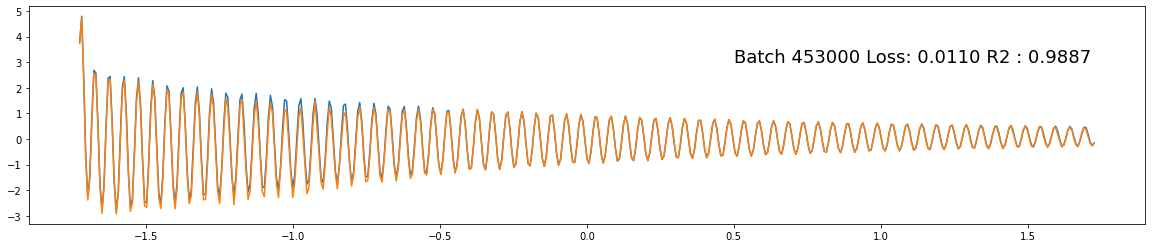

In [182]:
# Define the model and optimizer

model = MLP_6()
learning_rate = 0.01
optimizer = optim.Adamax(model.parameters(), lr=learning_rate)
model = model.to(device)

load_model = True
# Load models
if load_model:
    path = '../Models/one_curve_model_MLP_6.pt'
    checkpoint = torch.load(path)
    epoch = checkpoint['epoch']
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
else:
    epoch = 0
    initialize_weights(model)

# Define the loss function
criterion = nn.MSELoss()

# optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

#for epoch in range(num_epochs)
train_loss = 1.0

X_train, y_train = new_X, new_y
X_test, y_test = new_X, new_y

while train_loss > 0.002:


    # Clear the gradients
    optimizer.zero_grad()
    
    # Forward propagation
    outputs = model(X_train)

    # Calculate the loss function
    loss = criterion(outputs, y_train)

    # Backward propagation
    loss.backward()

    # Update parameters
    optimizer.step()

    train_loss = loss.item()
    
    epoch += 1
    
    if epoch % 1000 == 999: 
        
        with torch.no_grad():

            # Load the data
            
            # Make predictions on the test data
            predictions = model(X_test)
  
            original_X_test, orignial_predictions = dp.denormalize(X_test, outputs)
            _, original_y_test = dp.denormalize(X_test, y_test)

            # Import the r2_score function
            from sklearn.metrics import r2_score

            # Compute the R^2 score
            r2 = r2_score(orignial_predictions.detach().cpu().numpy(), original_y_test.detach().cpu().numpy())
            
            live_plot_X_y(X_test[:,0].cpu(), y_test.cpu(), predictions.cpu(), epoch + 1, train_loss, r2)
    
        # Print the statistics of the epoch 
        # print(predictions[0:10].detach().numpy(), y_test[0:10].detach().numpy())
        # for param in model.parameters():
        #     print(param.data)
        # print('Completed training batch', epoch + 1, 'Training Loss is: %.4f' %train_loss, 'R2 is: %.4f' %r2)
        


In [183]:
path = '../Models/one_curve_model_MLP_6.pt'
torch.save({'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            }, path)

Epoch: 453153
0.001997231272980571


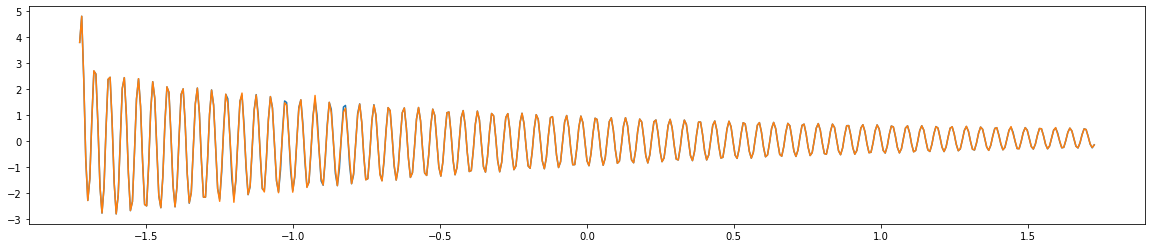

In [184]:
load_model = True
# Load models
if load_model:
    path = '../Models/one_curve_model_MLP_6.pt'
    checkpoint = torch.load(path)
    epoch = checkpoint['epoch']
    print("Epoch:", epoch)
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
else:
    initialize_weights(model)

with torch.no_grad():
    # model.train()
    # Load the data
    X_test, y_test = new_X, new_y

    # Make predictions on the test data
    predictions = model(X_test)
    # Calculate the loss function
    loss = criterion(predictions, y_test)

    # Track the loss value 
    val_loss = loss.item()  
    print(val_loss)
    
    original_X_test, orignial_predictions = dp.denormalize(X_train, outputs)
    _, original_y_test = dp.denormalize(X_train, y_train)

    # Import the r2_score function
    from sklearn.metrics import r2_score

    # Compute the R^2 score
    r2 = r2_score(orignial_predictions.detach().cpu().numpy(), original_y_test.detach().cpu().numpy())

    plot_X_y(X_test[:,0].cpu(), y_test.cpu(), predictions.cpu())

In [49]:
model = MLP_5().to(device)
initialize_weights(model)
# Define hyper-parameters
num_epochs = 3000
learning_rate = 0.01

# Define the loss function
criterion = nn.MSELoss()

# Define the optimizer
optimizer = optim.Adamax(model.parameters(), lr=learning_rate)

new_X = new_X.to(device)
new_y = new_y.to(device)
dataset = customDataset(new_X, new_y)
dataloader = DataLoader(dataset, batch_size=50, shuffle=True)

for epoch in range(num_epochs):
    
    running_train_loss = 0.0 
    running_val_loss = 0.0 
    running_r2_score = 0.0
    
    for data in dataloader:
        
        # Load the data
        X_train, y_train = data
        
        # Clear the gradients
        optimizer.zero_grad()

        # Forward propagation
        outputs = model(X_train)

        # Calculate the loss function
        loss = criterion(outputs, y_train)
        
        # Track the loss value 
        running_train_loss += loss.item()  
        
        # Backward propagation
        loss.backward()

        # Update parameters
        optimizer.step()

    # Calculate training loss value 
    train_loss_value = running_train_loss / len(dataloader) 
    
    with torch.no_grad():
        model.eval()
        
        # Load the data
        X_test, y_test = new_X, new_y

        # Make predictions on the test data
        predictions = model(X_test)

        # Calculate the loss function
        loss = criterion(predictions, y_test)

        # Track the loss value 
        val_loss = loss.item()  

        original_X_test, orignial_predictions = dp.denormalize(X_test, predictions)
        _, original_y_test = dp.denormalize(X_test, y_test)

        # Import the r2_score function
        from sklearn.metrics import r2_score

        # Compute the R^2 score
        r2 = r2_score(orignial_predictions.detach().cpu().numpy(), original_y_test.detach().cpu().numpy())
    
    epoch += 1
    if epoch % 100 == 99: 
        # Print the statistics of the epoch 
        # print(predictions[0:10].detach().numpy(), y_test[0:10].detach().numpy())
        # for param in model.parameters():
        #     print(param.data)
        print('Completed training batch', epoch + 1, 'Training Loss is: %.4f' %train_loss_value, 'Validation Loss is: %.4f' %val_loss, 'R2 is %.4f' % (r2))
        
        
with torch.no_grad():
    model.eval()
    # Load the data
    X_test, y_test = new_X, new_y

    # Make predictions on the test data
    predictions = model(X_test)

    original_X_test, orignial_predictions = dp.denormalize(X_test, predictions)
    _, original_y_test = dp.denormalize(X_test, y_test)
    plot_X_y(X_test[:,0], y_test, predictions)

Completed training batch 100 Training Loss is: 0.9154 Validation Loss is: 0.9971 R2 is -102.0593
Completed training batch 200 Training Loss is: 0.9457 Validation Loss is: 0.9860 R2 is -51.3624
Completed training batch 300 Training Loss is: 0.9397 Validation Loss is: 0.9836 R2 is -80.3342
Completed training batch 400 Training Loss is: 0.9302 Validation Loss is: 0.9799 R2 is -56.5986
Completed training batch 500 Training Loss is: 1.2650 Validation Loss is: 0.9829 R2 is -59.1734
Completed training batch 600 Training Loss is: 0.9173 Validation Loss is: 0.9813 R2 is -60.0160
Completed training batch 700 Training Loss is: 0.9268 Validation Loss is: 0.9815 R2 is -59.0005
Completed training batch 800 Training Loss is: 0.9136 Validation Loss is: 0.9815 R2 is -59.3155


KeyboardInterrupt: 

In [ ]:
new_df = df.copy()
plot_by_index(new_df, idx, output_cols)

In [ ]:
new_df = df.copy()
plot_inference(new_df, idx, trainer)